<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Cours XAI</center>
    <center> LAB1 : Modèles transparents</center>
<hr style=" border:none; height:3px;">
</h1>

# Prérequis
En utilisant pip, pip3, conda ou autre, il faudra installer les modules python suivants:
* numpy
* pandas
* scipy
* scikit-learn
* matplotlib
* pygam

# 1. Prise en main du ficher de données
Les données que nous allons utiliser sont des données qui indiquent le coût de l'assurance maladie pour plus de 1300 personnes.
Une personne est décrite par:
- son âge
- son sexe
- sa masse corporelle
- son nombre d'enfants
- si elle fume ou pas
- la région dans laquelle elle vit
- le coût de son assurance.

Nous allons dans un premier temps prendre en main le fichier de données.

In [6]:
import pandas as pd
data = pd.read_csv(r'insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#visualition du début de la table
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


On remarque:
- qu'il y a 7 colonnes, 1338 lignes
- qu'il n'y a pas de valeurs manquantes
- qu'il y a 3 colonnes catégorielles (object).


<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
 
Affichez les modalités (Les valeurs possibles pour chacune de ces colonnes) ainsi que l'effectif correspondant.
</div> 


In [8]:
pd.get_dummies(data)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
 
 Que pouvez-vous dire sur l'équilibre du jeu de données ? Apprendre sur ce dernier va-t-il poser un problème de représentativité ?
</div> 


In [10]:
#entrez ici votre réponse entre """ """

# 2. Régression linéaire
Nous allons appliquer dans un premier temps la régression linéaire. Cependant, elle ne prend pas correctement en compte les données catégorielles.
Nous allons devoir les transformer.

## Adaptation du jeu de données
La régression linéaire ne gère pas très bien les données catégorielles, en particulier quand elles ne sont pas ordonnées.
Classiquement, on transforme:

    - les données binaires ou à 2 modalités en 0 et 1
    - les données à au moins 3 modalités en un codage binaire de ces modalités: on se retrouve avec autant de colonnes binaires qu'il y a de modalités.
    
Pour les colonnes a deux modalités, on peut directement les transformer avec une méthode de conversion.

In [11]:
def YesNoConverter(val):
    if val=="yes": return 1
    else: return 0

data["smoker"] = data["smoker"].apply(YesNoConverter)

In [12]:
#faire la même chose ici

def MaleFemaleConverter(val):
    if val=="male": return 1
    else: return 0
    
data["sex"] = data["sex"].apply(MaleFemaleConverter)

<div class="alert alert-block alert-info"> 

 <b>Questions</b>
    
 
Pour la dernière colonne, nous allons utiliser la fonction  [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) qui fait tout le travail à notre place. Il faudra ensuite insérer les colonnes créées avec [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) et supprimer la colonne originale avec [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).
</div> 





In [13]:
#Réponse ici
df_data = pd.get_dummies(data)
df_data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


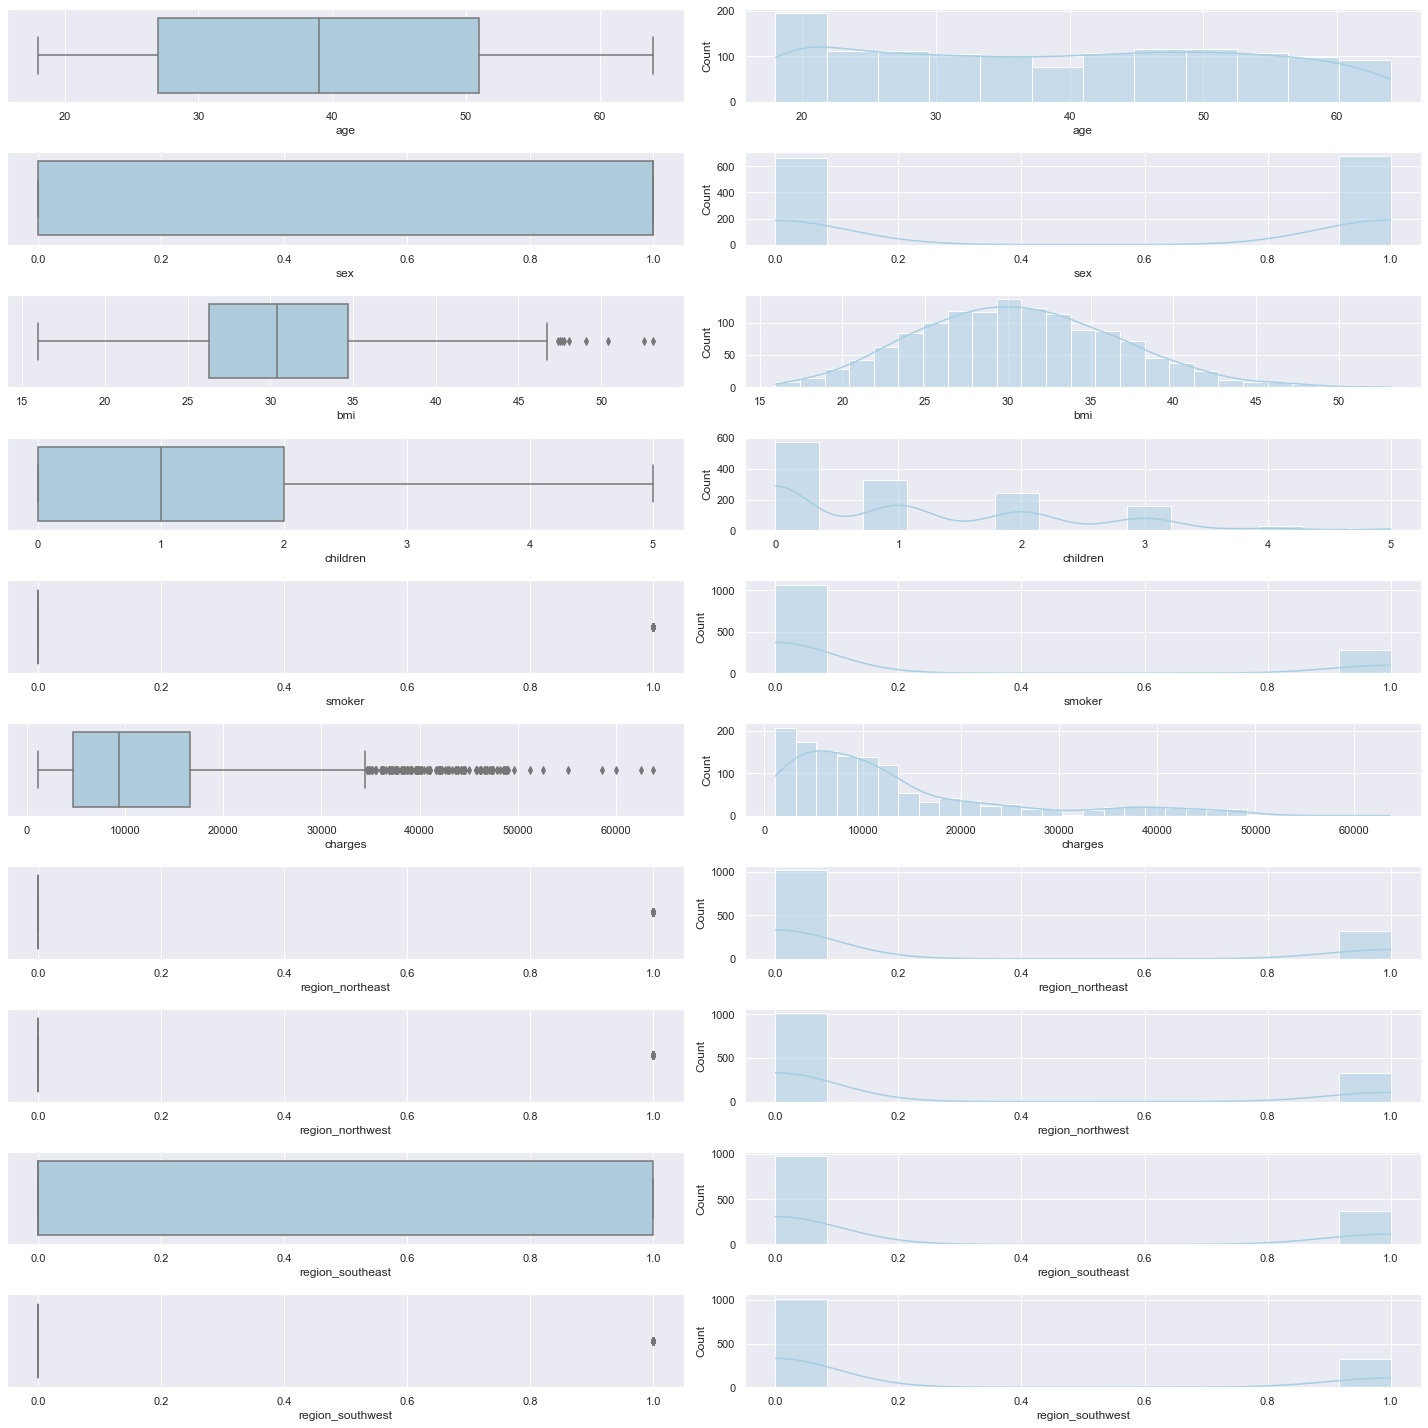

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(palette="Paired")
pastel_palette = {0: "C4", 1: "C2"}
bright_palette = {0: "C5", 1: "C3"}

fig, ax = plt.subplots(10, 2, figsize = (20, 20))

for i in range(len(df_data.columns)):
    sns.boxplot(x= df_data[df_data.columns[i]], ax = ax[i,0])
    sns.histplot(df_data[df_data.columns[i]], ax = ax[i,1], kde=True)
plt.tight_layout()


## Régression linéaire


<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
 
Maintenant que le jeu de données est prêt, utilisez [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de scikit learn pour obtenir un modèle linéaire.
</div> 



In [15]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

TARGET = "charges"

#Useless
train,test = train_test_split(df_data,train_size=0.8)
X_train = train.drop(columns = [TARGET])
y_train = train[TARGET]
X_test = test.drop(columns = [TARGET])
y_test = test[TARGET]

X = df_data.drop(columns = [TARGET])
y = df_data[TARGET]

model1 = LinearRegression().fit(X,y)

## Interprétation


<div class="alert alert-block alert-info"> 

 <b>Questions</b>
    
 
Maintenant que vous avez un modèle entraînez, mettez en oeuvre ce que nous avons vu en cours (et plus!) pour l'interpréter. Utilisez au moins les poids, la SE et le t pour chaque coefficient.
</div> 



In [16]:
from sklearn import *
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(model1.predict(X),y, squared=False)
print(f'The MSE for this model is {MSE}')

regression_results(model1.predict(X),y)

#se = np.array(np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(x.T, x)))))

The MSE for this model is 6041.6796511744515
explained_variance:  0.6683
r2:  0.6683
MAE:  4170.8869
MSE:  36501893.0074
RMSE:  6041.6797


In [18]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:09:39   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899     21.587      0.000     233.514     280.199
sex               -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northeast -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
region_northwest -1.229e+04    988.196    -12.438      0.000   -1.42e+04   -1.04e+04
region_southeast -1.297e+04   1079.158    -12.022      0.000   -1.51e+04   -1.09e+04
region_southwest  -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Tapez ici votre interpretation (que révèle le modèle?)
#Concluez sur l'utilisation de ce modèle pour ce dataset

# Arbre de régression
Nous allons à présent tester un deuxième modèle: les arbres de régression. Normalement, la plupart des algorithmes acceptent tous les types de données. Cependant, l'implémentation de scikit learn ne le permet pas. Nous allons donc conserver notre jeu de données tel que pré-traité auparavant.

J'attire sur votre attention que le problème ne vient pas des colonnes binaires (à deux modalités). En revanche, pour les colonnes catégorielles à plus de 2 modalités, l'implémentation de scikit learn traiterait plutôt des valeurs ordinales, et ce n'est pas le cas des régions chez nous. Vous trouverez sur le net des tas d'astuces qui vous diront de remplacer les modalités par des nombres, etc. Elles ne me paraissent pas judicieuses dans notre cas. Aussi, lors de l'interprétation du modèle, je vous demande de prendre avec précautions les 4 colonnes "région".

## Entraînement


<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
 

Entraînez un arbre de régression avec [scikit learn](https://scikit-learn.org/stable/modules/tree.html). Ne laissez pas les valeurs par défaut dans le constructeur, car sinon votre arbre sera très profond (et donc pas interprétable). Ajustez les paramètres tout en maintenant un taux de classification élevé. 
Remarque: pour cet exercice, il n'est pas nécessaire de mettre en place une cross-validation (on fait de la régression). On peut utilisé le taux de classification sur l'ensemble d'apprentissage ou un sous-ensemble, cela suffit pour cet exercice en tout cas.
</div> 




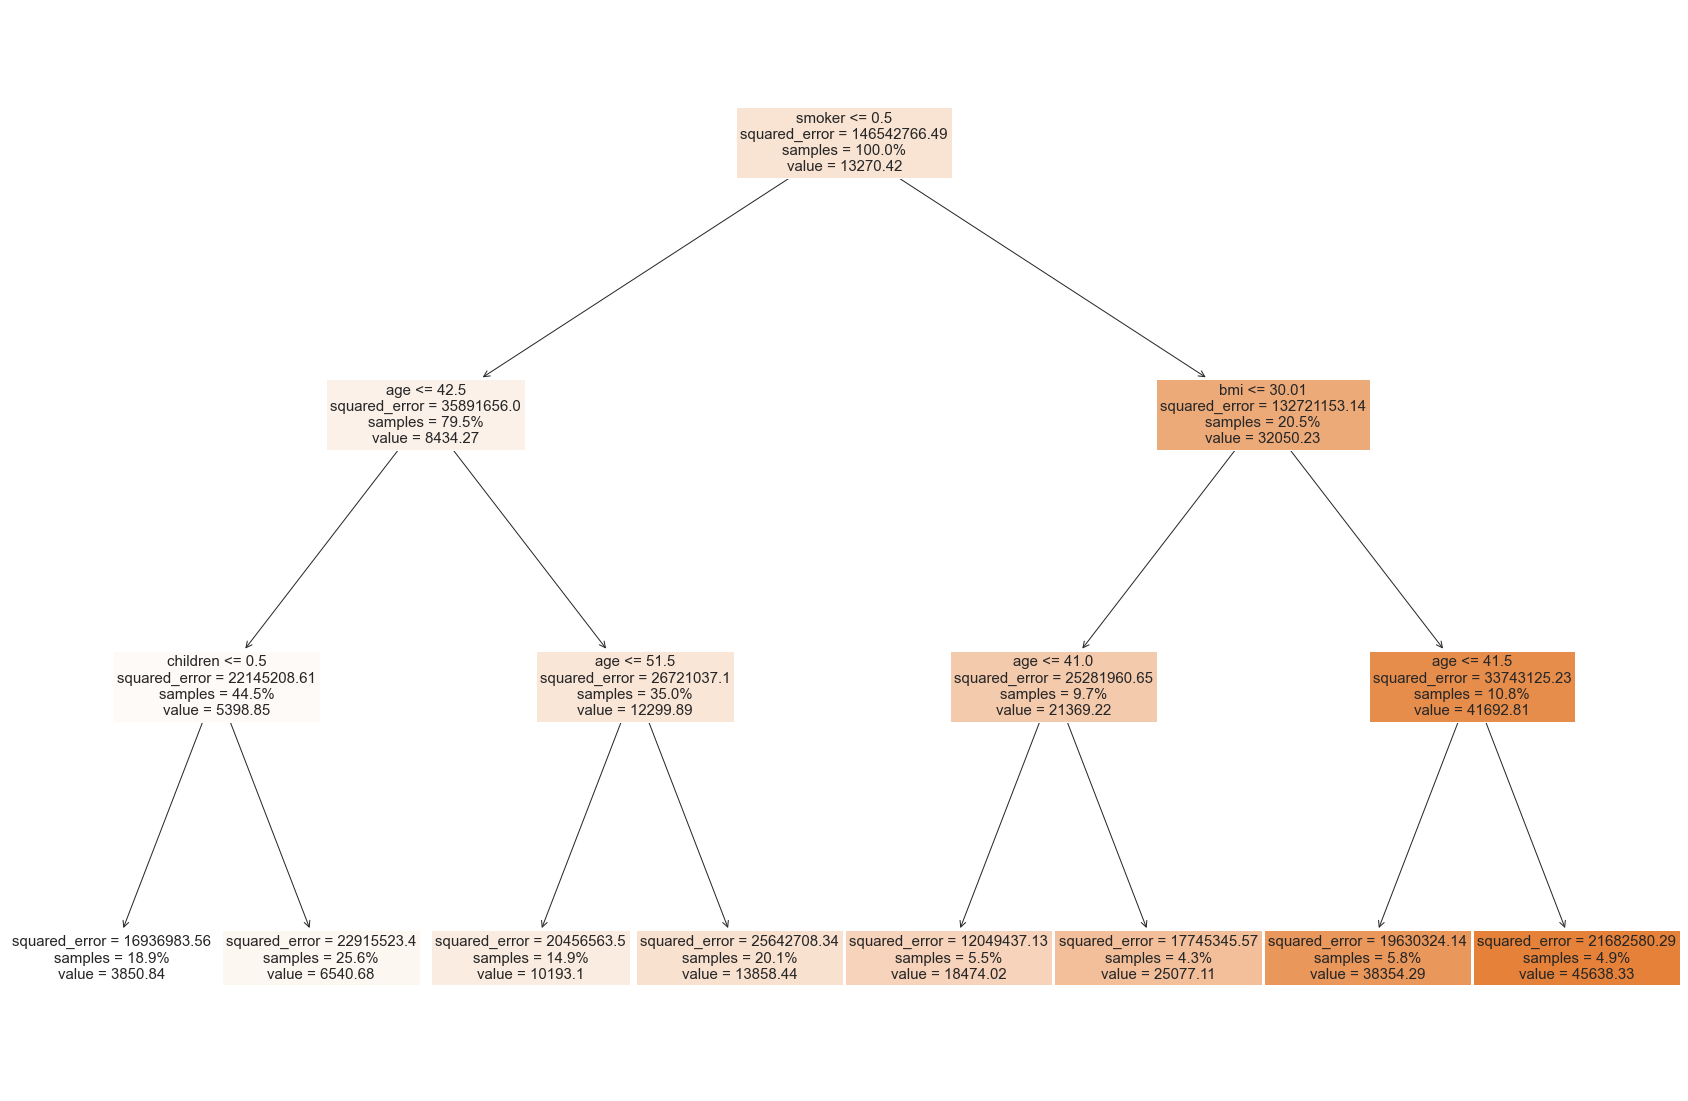

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt

model2 = tree.DecisionTreeRegressor(max_depth=3)
model2.fit(X,y);

fig = plt.figure(figsize=(30,20))
plot_arbisseau = tree.plot_tree(model2, 
                   feature_names=X.columns,  
                   filled=True,
                   proportion=True,
                   precision=2,
                   fontsize=15)
#plt.tight_layout()

fig.savefig("decistion_tree.png")

In [21]:
text_representation = tree.export_text(model2,feature_names=list(X.columns))
print(text_representation)


|--- smoker <= 0.50
|   |--- age <= 42.50
|   |   |--- children <= 0.50
|   |   |   |--- value: [3850.84]
|   |   |--- children >  0.50
|   |   |   |--- value: [6540.68]
|   |--- age >  42.50
|   |   |--- age <= 51.50
|   |   |   |--- value: [10193.10]
|   |   |--- age >  51.50
|   |   |   |--- value: [13858.44]
|--- smoker >  0.50
|   |--- bmi <= 30.01
|   |   |--- age <= 41.00
|   |   |   |--- value: [18474.02]
|   |   |--- age >  41.00
|   |   |   |--- value: [25077.11]
|   |--- bmi >  30.01
|   |   |--- age <= 41.50
|   |   |   |--- value: [38354.29]
|   |   |--- age >  41.50
|   |   |   |--- value: [45638.33]



<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
 
Prenez la dernière ligne du jeu de données, et retrouvez le chemin de la décision dans l'arbre avec la méthode [decision_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.decision_path). L'idée est de connaître la liste des tests par lesquels l'instance est passée.
</div> 





In [58]:
import pydotplus
from sklearn import tree

model2 = tree.DecisionTreeRegressor(random_state=42,max_depth=3)

model2 = model2.fit(X, y)

dot_data = tree.export_graphviz(model2, out_file=None,
                                feature_names=X.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# empty all nodes, i.e.set color to white and number of samples to zero
for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

samples = X.iloc[-1].values.reshape(1, -1)
decision_paths = model2.decision_path(samples)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

filename = 'tree.png'
graph.write_png(filename)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


True

![tree](tree.png)

In [44]:
path = model2.decision_path(X.iloc[-1].values.reshape(1, -1), check_input=True)
print(path)

  (0, 0)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Interprétation


<div class="alert alert-block alert-info"> 

 <b>Question</b>
    
A présent, interprétez le modèle (intéressez-vous à la feature importance). Que révèle l'arbre?
</div> 

In [23]:
#tapez ici votre interprétation entre """ """

# GAM
Nous allons passer au troisième type de modèle: les GAM.

## Entraînement




En utilisant le module pyGam, entraînez un GAM pour notre tâche de régression. Ne laissez pas les paramètres par défaut.

In [24]:
from pygam import LinearGAM, s

model3 = LinearGAM()
model3.fit(X,y)


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + intercept,
   tol=0.0001, verbose=False)

Pourquoi avez-vous choisi cette architecture de GAM?

In [25]:
#tapez ici votre justification entre """ """

## Interprétation
Visualisez les termes de votre GAM. On vous donne le code :).

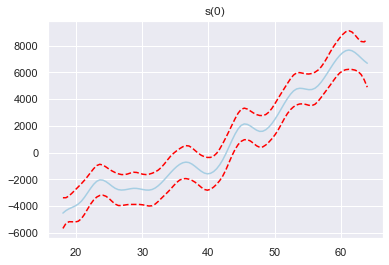

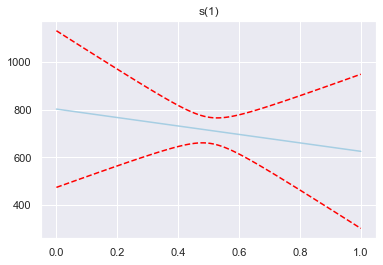

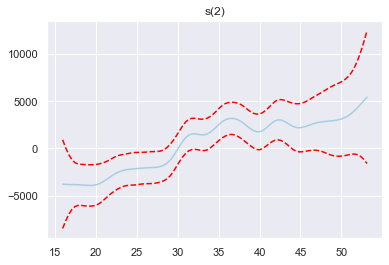

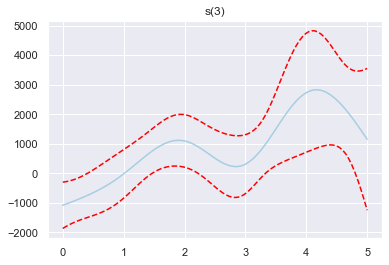

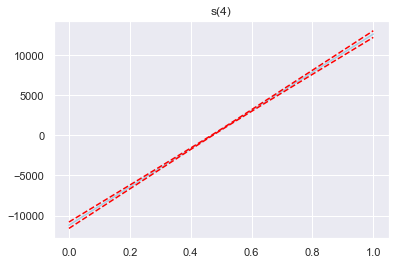

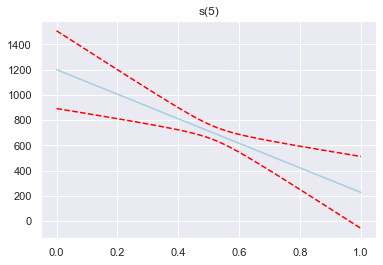

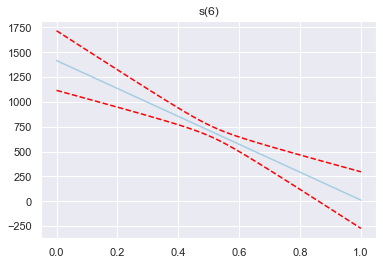

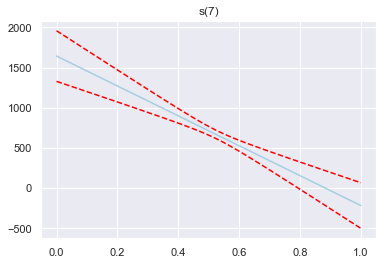

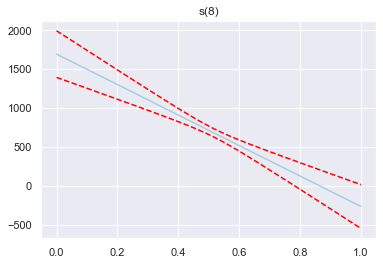

In [26]:
for i, term in enumerate(model3.terms):
    if term.isintercept:
        continue

    XX = model3.generate_X_grid(term=i)
    pdep, confi = model3.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

Quelles informations tirez-vous du GAM ?

In [27]:
#Votre réponse ici entre """ """

# Conclusion
Indiquez ce que les différents modèles vous ont apporté comme connaissances sur les données et le fonctionnement de ces modèles.

Smoker est la variable la plus importante pour tous les modèles